# MultiConAD Data Analysis
Some useful visualization plots

In [13]:
# import pandas as pd
# import json
# import os
# import librosa
# import soundfile as sf
# from pathlib import Path
# from joblib import Parallel, delayed


# # Read training data
# train_df = pd.read_json('../data/MultiConAD/train_English.jsonl', lines=True)
# train_df['split'] = 'train'

# # Read test data
# test_df = pd.read_json('../data/MultiConAD/test_English.jsonl', lines=True)
# test_df['split'] = 'test'

# # Combine into a single dataframe
# df = pd.concat([train_df, test_df], ignore_index=True)

# print(f"Combined dataframe shape: {df.shape}")
# print(f"Split distribution:\n{df['split'].value_counts()}")


# # Extract audio metadata from wav files
# audio_dir = '../data/MultiConAD'

# def extract_audio_metadata(audio_path):
#     """Extract metadata from an audio file"""
#     metadata = {
#         'duration': None,
#         'sampling_rate': None,
#         'n_samples': None,
#         'file_exists': False,
#         'file_size_mb': None
#     }
    
#     if not os.path.exists(audio_path):
#         print("Not found:", audio_path)
#         return metadata
    
#     metadata['file_exists'] = True
#     metadata['file_size_mb'] = os.path.getsize(audio_path) / (1024 * 1024)
    
#     try:
#         # Try with librosa first (works with mp3 and wav)
#         y, sr = librosa.load(audio_path, sr=None)
#         metadata['duration'] = librosa.get_duration(y=y, sr=sr)
#         metadata['sampling_rate'] = sr
#         metadata['n_samples'] = len(y)
#     except Exception as e:
#         print(f"Librosa error for {audio_path}: {e}")
#         # Fallback to soundfile for wav files
#         try:
#             data, sr = sf.read(audio_path)
#             metadata['sampling_rate'] = sr
#             metadata['n_samples'] = len(data)
#             metadata['duration'] = len(data) / sr
#         except Exception as e2:
#             print(f"Error reading {audio_path}: {e2}")
    
#     return metadata

# # Find audio filename in dataframe and extract metadata
# def get_audio_metadata_for_row(row):
#     """Get metadata for audio file referenced in a dataframe row"""
#     # Try different possible audio filename patterns
#     if 'Audio_file' in row and pd.notna(row['Audio_file']):
#         filename = row['Audio_file']
#         audio_path = os.path.join(audio_dir, filename)
#         if os.path.exists(audio_path):
#             print(f"Found: {audio_path}")
#             return extract_audio_metadata(audio_path)
#     return extract_audio_metadata('')  # Return empty metadata if not found

# print("Extracting audio metadata... This may take a few minutes")
# # Extract metadata for all entries
# metadata_list = []
# metadata_list = Parallel(n_jobs=-1)(
#     delayed(get_audio_metadata_for_row)(row) 
#     for idx, row in df.iterrows()
# )

# # Create metadata dataframe and merge with original dataframe
# metadata_df = pd.DataFrame(metadata_list)
# df = pd.concat([df, metadata_df], axis=1)

# del metadata_df

# print(f"\nAudio metadata extraction complete!")
# print(f"Audio files found: {df['file_exists'].sum()} / {len(df)}")

# df.to_csv('../data/MultiConAD/metadata.csv', index=False)

In [1]:
import pandas as pd
df=pd.read_csv('../data/MultiConAD/metadata.csv')

In [2]:
df.head()

,PID,Languages,MMSE,Diagnosis,Participants,Dataset,Modality,Task,File_ID,Media,...,Text_length,Audio_file,egemaps,bert,split,duration,sampling_rate,n_samples,file_exists,file_size_mb
0,Unknown,en,Unknown,HC,[],Taukdial,Unknown,[''],taukdial-088-2,Unknown,...,899,wav/taukdial-088-2.wav,"[35.82573318481445, 0.24653489887714303, 29.72...","[-0.497209906578063, -0.016425238922238003, 0....",train,70.195000,16000,1123120,True,3.213314
1,11312/a-00064237-1,eng,14,Dementia,"INV Investigator, PAR Participant",Baycrest,audio,"['', 'Cinderella', 'Repetition']",Baycrest12814,audio,...,2612,wav/Baycrest12814.wav,"[22.021364212036133, 0.431185334920883, 13.775...","[-0.065985210239887, 0.308695942163467, 0.2216...",train,329.508571,44100,14531328,True,55.432659
2,11312/a-00090458-0,eng,17,Dementia,"INV Investigator, PAR Participant",Pitt,audio,"['', 'Cookie']",220-0,audio,...,687,wav/Pitt_220-0.wav,"[35.32065963745117, 0.19119776785373602, 31.70...","[-0.8294044137001031, 0.344268560409545, 0.777...",train,66.891179,44100,2949901,True,5.626532
3,11312/a-00090672-0,eng,30,HC,"INV Investigator, PAR Participant",Pitt,audio,"['', 'Cookie']",052-0,audio,...,312,wav/Pitt_052-0.wav,"[26.639863967895508, 0.179629698395729, 24.493...","[-0.19369575381278903, -0.028598608449101, 0.3...",train,54.066440,44100,2384330,True,4.547791
4,11312/a-00094911-0,eng,Unknown,HC,"INV Investigator, PAR Participant",Delaware,audio,"['', 'Cookie', 'Cat', 'Rockwell', 'Cinderella_...",282-1,audio,...,3593,wav/Delaware_282-1.wav,"[35.44463348388672, 0.20987793803215002, 30.61...","[-0.45425474643707203, -0.18311129510402602, 0...",train,526.296000,48000,25262208,True,96.367718


In [3]:
print(f"Combined dataframe shape: {df.shape}")
print(f"Total number of samples: {len(df)}")
print(f"Split distribution:\n{df['split'].value_counts()}")
print(f"Total Time: {df['duration'].sum() / 3600:.2f} hours")

Combined dataframe shape: (2359, 36)
Total number of samples: 2359
Split distribution:
split
train    2131
test      228
Name: count, dtype: int64
Total Time: 112.24 hours


/tmp/ipykernel_210400/1330740522.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([df[df['Dataset'] == dataset]['duration'].dropna() / 60 for dataset in datasets],


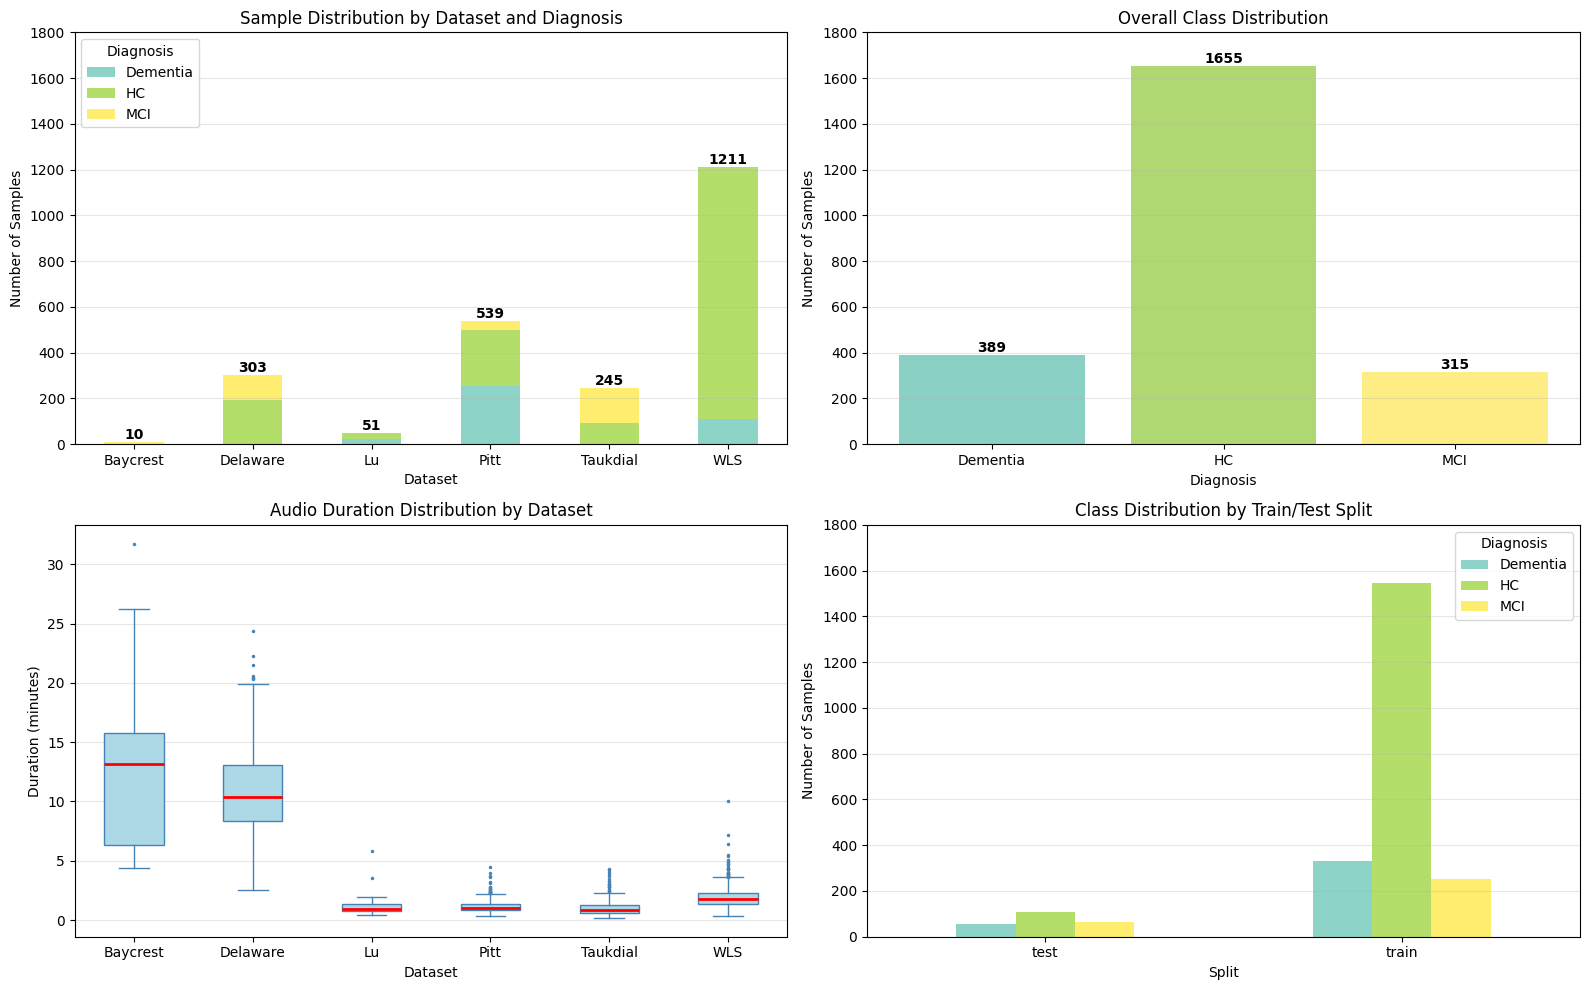

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

datasets=df['Dataset'].unique().tolist()
datasets.sort()
diagnosis_counts = df.groupby(['Dataset', 'Diagnosis']).size().unstack(fill_value=0)
diagnosis_dist = df['Diagnosis'].value_counts().sort_index()
split_diagnosis = df.groupby(['split', 'Diagnosis']).size().unstack(fill_value=0)

# Plot 1: Stacked bar plot of datasets by diagnosis
diagnosis_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='Set3')
for i, (idx, row) in enumerate(diagnosis_counts.iterrows()):
    total = row.sum()
    axes[0, 0].text(i, total, str(int(total)), ha='center', va='bottom', fontweight='bold')
axes[0, 0].set_xlabel('Dataset')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].set_title('Sample Distribution by Dataset and Diagnosis')
axes[0, 0].legend(title='Diagnosis', loc='upper left')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0, ha='center')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim(0, 1800)

# Plot 2: Box plot of audio duration by dataset
axes[1, 0].boxplot([df[df['Dataset'] == dataset]['duration'].dropna() / 60 for dataset in datasets],
           labels=datasets,
           patch_artist=True,
           whis=1.5,
           showfliers=True,
           boxprops=dict(facecolor='lightblue', color='steelblue'),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='steelblue'),
           capprops=dict(color='steelblue'),
           flierprops=dict(marker='.', markerfacecolor='steelblue', markersize=5, linestyle='none', markeredgecolor='none'))
axes[1, 0].set_xlabel('Dataset')
axes[1, 0].set_ylabel('Duration (minutes)')
axes[1, 0].set_title('Audio Duration Distribution by Dataset')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 3: Overall diagnosis distribution
axes[0, 1].bar(diagnosis_dist.index, diagnosis_dist.values, color=['#8bd0c5', '#afd872', '#feed85'])
axes[0, 1].set_xlabel('Diagnosis')
axes[0, 1].set_ylabel('Number of Samples')
axes[0, 1].set_title('Overall Class Distribution')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(diagnosis_dist.values):
    axes[0, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
axes[0, 1].set_ylim(0, 1800)

# Plot 4: Class distribution by split
split_diagnosis.plot(kind='bar', ax=axes[1, 1], colormap='Set3')
axes[1, 1].set_xlabel('Split')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_title('Class Distribution by Train/Test Split')
axes[1, 1].legend(title='Diagnosis')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim(0, 1800)

plt.tight_layout()
plt.savefig('../proposal/dataset.png')
plt.show()


In [10]:
print(diagnosis_dist.index.sort_values())


Index(['Dementia', 'HC', 'MCI'], dtype='object', name='Diagnosis')


## Some things I will write on the report
### Key Notes
- Large recordings with variable length.
- Variable data sources - prone to biases.
- Class Imbalance.
- Transcripts provided by MultiConAD.
- Timestamps provided from the original DementiaBank CHAT transcripts.
- Two speaker converations.

### Summary table
| MultiConAD Implementation | Total Rec Time | Total Samples | Train Split | Test Split | Notes |
| --- | --- | --- | --- | --- | --- |
| Original (English only) | Not specified | 2411 | 2201 | 210 | Less Delaware samples, VAS included | 
| Ours | 112.24 hours | 2359 | 2131 | 228 | More Delaware samples, VAS excluded, KEMPLER EXCLUDED (WHY?)

### Implementation Details
- We chose the monolingual English subset (non-translated)
- The development of Delaware is ongoing, so we included newer samples
- We excluded VAS samples, as they do not contain conversational data nor timestamps